In [1]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

In [2]:
train_path = '../data/raw/train.csv'
test_path = '../data/raw/test.csv'

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

display(df_train)
display(df_test)

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,124000
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,123500
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,91500
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,130000
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,117000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118817,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200707,12,11,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000
1118818,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200708,25,10,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000
1118819,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200708,31,20,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,28000
1118820,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200709,15,8,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,29000


,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.9700,202307,26,5,1987,...,직영,4858.00,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0
1,서울특별시 강남구 개포동,651-1,651.0,1.0,개포더샵트리에,108.2017,202308,15,10,2021,...,위탁,2724.46,305.0,의무,2022-02-23 13:01:10.0,Y,N,127.056394,37.484892,2022-02-23 11:05:05.0
2,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,161.0000,202307,28,15,1984,...,위탁,61064.24,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0
3,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,133.4600,202308,10,14,1984,...,위탁,61064.24,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0
4,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,104.4300,202308,18,6,1984,...,위탁,61064.24,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.6500,202307,19,13,2014,...,위탁,14171.00,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.106720,37.618870,2014-09-01 13:05:03.0
9268,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.6200,202307,25,12,2014,...,위탁,14171.00,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.106720,37.618870,2014-09-01 13:05:03.0
9269,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.6500,202308,27,12,2014,...,위탁,14171.00,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.106720,37.618870,2014-09-01 13:05:03.0
9270,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.9400,202309,2,18,2014,...,위탁,14171.00,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.106720,37.618870,2014-09-01 13:05:03.0


In [3]:
# train 데이터셋과 test 데이터셋 합치기
# 합쳐서 전처리하면 전처리하기 용이하다는 장점이 있지만 미래 데이터를 보는 것이기 때문에 Data Leakage 문제가 발생할 수 있으므로 목적과 상황에 맞게 판단해서 사용.
df_train['is_test'] = 0
df_test['is_test'] = 1

df_all = pd.concat([df_train, df_test])
df_all.shape

(1128094, 53)

In [4]:
df_all.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target', 'is_test'],
      dtype='object')

In [5]:
# 컬러명 단순화 - 'k'제거
for col in df_all.columns:
    if 'k' in col:
        name = col.split('-')[1]
        df_all = df_all.rename(columns={col: name})

In [6]:
# 컬럼명 단순화 - ㎡ 제거
df_all = df_all.rename(columns={'전용면적(㎡)':'전용면적'})
df_all = df_all.rename(columns={'전용면적별세대현황(60㎡이하)':'전용면적별세대현황(60이하)'})
df_all = df_all.rename(columns={'전용면적별세대현황(60㎡~85㎡이하)':'전용면적별세대현황(60~85이하)'})
df_all = df_all.rename(columns={'85㎡~135㎡이하':'85~135이하'})
df_all = df_all.rename(columns={'135㎡초과':'135초과'})

In [7]:
# 회의에서 제거하기로한 컬럼들 제거
del_cols = ['전화번호', '팩스번호', '사용검사일', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일',
            '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', '단지소개기존clob', '홈페이지', '등록일자']

selected_cols = [col for col in df_all.columns if col not in del_cols]
assert len(df_all.columns) == len(del_cols) + len(selected_cols)

In [8]:
df_selec = df_all[selected_cols]
df_selec.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', '단지분류(아파트,주상복합등등)', '세대타입(분양형태)', '관리방식', '복도유형', '난방방식', '전체동수',
       '전체세대수', '건설사(시공사)', '시행사', '연면적', '주거전용면적', '관리비부과면적',
       '전용면적별세대현황(60이하)', '전용면적별세대현황(60~85이하)', '85~135이하', '135초과', '수정일자',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '좌표X', '좌표Y', 'target',
       'is_test'],
      dtype='object')

In [9]:
print(f"컬럼 제거 후 최종 데이터 형태 : {df_selec.shape}")

컬럼 제거 후 최종 데이터 형태 : (1128094, 35)


In [10]:
# 시군구명을 '시', '군', '구'로 변환
df_selec['시'] = df_selec['시군구'].apply(lambda x : x.split()[0])
df_selec['군'] = df_selec['시군구'].apply(lambda x : x.split()[1])
df_selec['구'] = df_selec['시군구'].apply(lambda x : x.split()[2])
del df_selec['시군구']

In [11]:
df_selec.columns

Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도', '도로명',
       '단지분류(아파트,주상복합등등)', '세대타입(분양형태)', '관리방식', '복도유형', '난방방식', '전체동수',
       '전체세대수', '건설사(시공사)', '시행사', '연면적', '주거전용면적', '관리비부과면적',
       '전용면적별세대현황(60이하)', '전용면적별세대현황(60~85이하)', '85~135이하', '135초과', '수정일자',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '좌표X', '좌표Y', 'target',
       'is_test', '시', '군', '구'],
      dtype='object')

In [12]:
df_selec = df_selec.rename(columns={'전용면적별세대현황(60이하)' : '전용면적별세대현황(18평이하)'})
df_selec = df_selec.rename(columns={'전용면적별세대현황(60~85이하)' : '전용면적별세대현황(18~25이하)'})
df_selec = df_selec.rename(columns={'85~135이하' : '25~40이하'})
df_selec = df_selec.rename(columns={'135초과' : '40초과'})

## 결측치 제거

In [13]:
df_selec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128094 entries, 0 to 9271
Data columns (total 37 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   번지                   1127867 non-null  object 
 1   본번                   1128019 non-null  float64
 2   부번                   1128019 non-null  float64
 3   아파트명                 1125958 non-null  object 
 4   전용면적                 1128094 non-null  float64
 5   계약년월                 1128094 non-null  int64  
 6   계약일                  1128094 non-null  int64  
 7   층                    1128094 non-null  int64  
 8   건축년도                 1128094 non-null  int64  
 9   도로명                  1128094 non-null  object 
 10  단지분류(아파트,주상복합등등)     250821 non-null   object 
 11  세대타입(분양형태)           251969 non-null   object 
 12  관리방식                 251969 non-null   object 
 13  복도유형                 251640 non-null   object 
 14  난방방식                 251969 non-null   object 
 15  전

In [14]:
# 결측치 비율
missing = (df_selec.isnull().sum() / len(df_selec)) * 100
missing = missing[missing > 0]
missing_cols = missing.index.tolist()
missing

번지                      0.020122
본번                      0.006648
부번                      0.006648
아파트명                    0.189346
단지분류(아파트,주상복합등등)       77.765949
세대타입(분양형태)             77.664184
관리방식                   77.664184
복도유형                   77.693348
난방방식                   77.664184
전체동수                   77.760098
전체세대수                  77.664184
건설사(시공사)               77.798215
시행사                    77.815678
연면적                    77.664184
주거전용면적                 77.668173
관리비부과면적                77.664184
전용면적별세대현황(18평이하)       77.668173
전용면적별세대현황(18~25이하)     77.668173
25~40이하                77.668173
40초과                   99.970836
수정일자                   77.668173
건축면적                   77.677835
주차대수                   77.677658
기타/의무/임대/임의=1/2/3/4    77.664184
좌표X                    77.673669
좌표Y                    77.673669
target                  0.821917
dtype: float64

In [15]:
non_missing_cols = [col for col in df_selec.columns if col not in missing_cols]
non_missing_cols
assert len(df_selec.columns) == len(missing_cols) + len(non_missing_cols)

In [16]:
missing.sort_values(ascending=False)

40초과                   99.970836
시행사                    77.815678
건설사(시공사)               77.798215
단지분류(아파트,주상복합등등)       77.765949
전체동수                   77.760098
복도유형                   77.693348
건축면적                   77.677835
주차대수                   77.677658
좌표X                    77.673669
좌표Y                    77.673669
주거전용면적                 77.668173
전용면적별세대현황(18평이하)       77.668173
전용면적별세대현황(18~25이하)     77.668173
25~40이하                77.668173
수정일자                   77.668173
관리방식                   77.664184
난방방식                   77.664184
세대타입(분양형태)             77.664184
전체세대수                  77.664184
기타/의무/임대/임의=1/2/3/4    77.664184
관리비부과면적                77.664184
연면적                    77.664184
target                  0.821917
아파트명                    0.189346
번지                      0.020122
본번                      0.006648
부번                      0.006648
dtype: float64

### 40초과 컬럼

In [17]:
display(df_selec[['전용면적', '연면적', '주거전용면적', '관리비부과면적', '전용면적별세대현황(18평이하)', '전용면적별세대현황(18~25이하)', '25~40이하', '40초과', '건축면적']][df_selec['40초과'].isnull() == True])
display(df_selec[['전용면적', '연면적', '주거전용면적', '관리비부과면적', '전용면적별세대현황(18평이하)', '전용면적별세대현황(18~25이하)', '25~40이하', '40초과', '건축면적']][df_selec['40초과'].isnull() == False])

,전용면적,연면적,주거전용면적,관리비부과면적,전용면적별세대현황(18평이하),전용면적별세대현황(18~25이하),25~40이하,40초과,건축면적
0,79.97,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,4858.0
1,79.97,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,4858.0
2,54.98,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,4858.0
3,79.97,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,4858.0
4,79.97,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,4858.0
...,...,...,...,...,...,...,...,...,...
9267,84.65,190866.0,93849.0,92808.0,808.0,504.0,90.0,NaN,14171.0
9268,84.62,190866.0,93849.0,92808.0,808.0,504.0,90.0,NaN,14171.0
9269,101.65,190866.0,93849.0,92808.0,808.0,504.0,90.0,NaN,14171.0
9270,84.94,190866.0,93849.0,92808.0,808.0,504.0,90.0,NaN,14171.0


,전용면적,연면적,주거전용면적,관리비부과면적,전용면적별세대현황(18평이하),전용면적별세대현황(18~25이하),25~40이하,40초과,건축면적
93602,111.32,84712.0,46154.0,38875.0,0.0,0.0,204.0,70.0,4209.7
93603,111.32,84712.0,46154.0,38875.0,0.0,0.0,204.0,70.0,4209.7
93604,114.43,84712.0,46154.0,38875.0,0.0,0.0,204.0,70.0,4209.7
93605,114.43,84712.0,46154.0,38875.0,0.0,0.0,204.0,70.0,4209.7
93606,112.23,84712.0,46154.0,38875.0,0.0,0.0,204.0,70.0,4209.7
...,...,...,...,...,...,...,...,...,...
966270,101.91,84712.0,46154.0,38875.0,0.0,0.0,204.0,70.0,4209.7
966271,101.90,84712.0,46154.0,38875.0,0.0,0.0,204.0,70.0,4209.7
966272,101.91,84712.0,46154.0,38875.0,0.0,0.0,204.0,70.0,4209.7
8906,101.90,84712.0,46154.0,38875.0,0.0,0.0,204.0,70.0,4209.7


In [18]:
df_selec[['전용면적', '전용면적별세대현황(18평이하)', '전용면적별세대현황(18~25이하)', '25~40이하', '40초과', '전체세대수', '아파트명', '시', '군', '구']]

,전용면적,전용면적별세대현황(18평이하),전용면적별세대현황(18~25이하),25~40이하,40초과,전체세대수,아파트명,시,군,구
0,79.97,20.0,250.0,0.0,NaN,270.0,개포6차우성,서울특별시,강남구,개포동
1,79.97,20.0,250.0,0.0,NaN,270.0,개포6차우성,서울특별시,강남구,개포동
2,54.98,20.0,250.0,0.0,NaN,270.0,개포6차우성,서울특별시,강남구,개포동
3,79.97,20.0,250.0,0.0,NaN,270.0,개포6차우성,서울특별시,강남구,개포동
4,79.97,20.0,250.0,0.0,NaN,270.0,개포6차우성,서울특별시,강남구,개포동
...,...,...,...,...,...,...,...,...,...,...
9267,84.65,808.0,504.0,90.0,NaN,1402.0,신내우디안1단지,서울특별시,중랑구,신내동
9268,84.62,808.0,504.0,90.0,NaN,1402.0,신내우디안1단지,서울특별시,중랑구,신내동
9269,101.65,808.0,504.0,90.0,NaN,1402.0,신내우디안1단지,서울특별시,중랑구,신내동
9270,84.94,808.0,504.0,90.0,NaN,1402.0,신내우디안1단지,서울특별시,중랑구,신내동


In [19]:
len(df_selec['아파트명'].unique())

6550

In [20]:
null_under_18 = df_selec[df_selec['전용면적별세대현황(18평이하)'].isnull() == True]['아파트명'].unique().tolist()
null_18_to_25 = df_selec[df_selec['전용면적별세대현황(18~25이하)'].isnull() == True]['아파트명'].unique().tolist()
null_25_to_40 = df_selec[df_selec['25~40이하'].isnull() == True]['아파트명'].unique().tolist()
null_over_40 = df_selec[df_selec['40초과'].isnull() == True]['아파트명'].unique().tolist()

print(f"전용면적이 18평 이하이며 결측치 데이터인 아파트의 수 : {len(null_under_18)}")
print(f"전용면적이 18 ~ 25평 이하이며 결측치 데이터인 아파트의 수 : {len(null_18_to_25)}")
print(f"전용면적이 25 ~ 40평 이하이며 결측치 데이터인 아파트의 수 : {len(null_25_to_40)}")
print(f"전용면적이 40평 초과이며 결측치 데이터인 아파트의 수 : {len(null_over_40)}")

전용면적이 18평 이하이며 결측치 데이터인 아파트의 수 : 5867
전용면적이 18 ~ 25평 이하이며 결측치 데이터인 아파트의 수 : 5867
전용면적이 25 ~ 40평 이하이며 결측치 데이터인 아파트의 수 : 5867
전용면적이 40평 초과이며 결측치 데이터인 아파트의 수 : 6549


In [21]:
df_selec['impute_40'] = df_selec['전체세대수'] - (df_selec['전용면적별세대현황(18평이하)'] + df_selec['전용면적별세대현황(18~25이하)'] + df_selec['25~40이하'])
df_selec

,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,도로명,...,주차대수,기타/의무/임대/임의=1/2/3/4,좌표X,좌표Y,target,is_test,시,군,구,impute_40
0,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,언주로 3,...,262.0,임의,127.05721,37.476763,124000.0,0,서울특별시,강남구,개포동,0.0
1,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,언주로 3,...,262.0,임의,127.05721,37.476763,123500.0,0,서울특별시,강남구,개포동,0.0
2,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,언주로 3,...,262.0,임의,127.05721,37.476763,91500.0,0,서울특별시,강남구,개포동,0.0
3,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,언주로 3,...,262.0,임의,127.05721,37.476763,130000.0,0,서울특별시,강남구,개포동,0.0
4,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,언주로 3,...,262.0,임의,127.05721,37.476763,117000.0,0,서울특별시,강남구,개포동,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,신내역로1길 85,...,1568.0,의무,127.10672,37.618870,NaN,1,서울특별시,중랑구,신내동,0.0
9268,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,신내역로1길 85,...,1568.0,의무,127.10672,37.618870,NaN,1,서울특별시,중랑구,신내동,0.0
9269,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,신내역로1길 85,...,1568.0,의무,127.10672,37.618870,NaN,1,서울특별시,중랑구,신내동,0.0
9270,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,신내역로1길 85,...,1568.0,의무,127.10672,37.618870,NaN,1,서울특별시,중랑구,신내동,0.0


In [22]:
print(df_selec['impute_40'].isnull().sum() / len(df_selec) * 100)

77.6681730423174


### 복도유형

In [23]:
print('계단식')
display(df_selec[df_selec['복도유형'] == '계단식']['아파트명'].unique()[:5])
print('-' * 30)
print('혼합식')
display(df_selec[df_selec['복도유형'] == '혼합식']['아파트명'].unique()[:5])
print('-' * 30)
print('복도식')
display(df_selec[df_selec['복도유형'] == '복도식']['아파트명'].unique()[:5])
print('-' * 30)
print('타워형')
display(df_selec[df_selec['복도유형'] == '타워형']['아파트명'].unique()[:5])
print('-' * 30)
print('기타')
display(df_selec[df_selec['복도유형'] == '기타']['아파트명'].unique()[:5])

계단식


array(['개포6차우성', '개포자이', '개포주공1단지', '동양파라곤', '래미안대치하이스턴'], dtype=object)

------------------------------
혼합식


array(['개포우성3차', '개포주공6단지', '대치삼성', '대치현대', '도곡우성'], dtype=object)

------------------------------
복도식


array(['개포주공5단지', '마일스디오빌', '테헤란로대우아이빌', '은마', '한화진넥스빌'], dtype=object)

------------------------------
타워형


array(['아크로힐스논현', '강동역신동아파밀리에', '서초롯데캐슬프레지던트', '서울숲더샵', '정릉꿈에그린'],
      dtype=object)

------------------------------
기타


array(['대치효성', '롯데캐슬리베', '현대까르띠에710', '강동이루미', '태흥'], dtype=object)

In [24]:
df_selec['복도유형'].value_counts()

계단식    124964
혼합식     85513
복도식     38710
타워형      1371
기타       1082
Name: 복도유형, dtype: int64

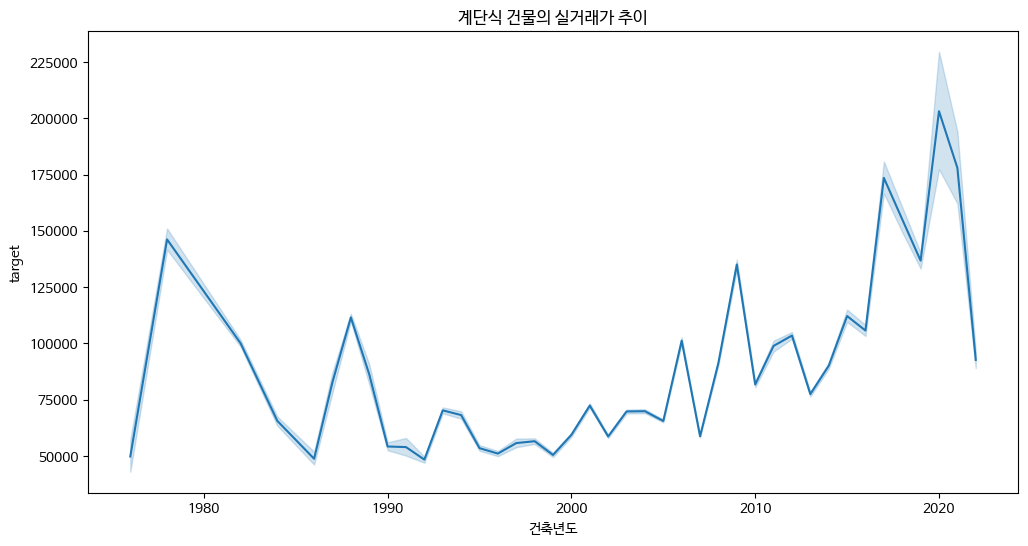

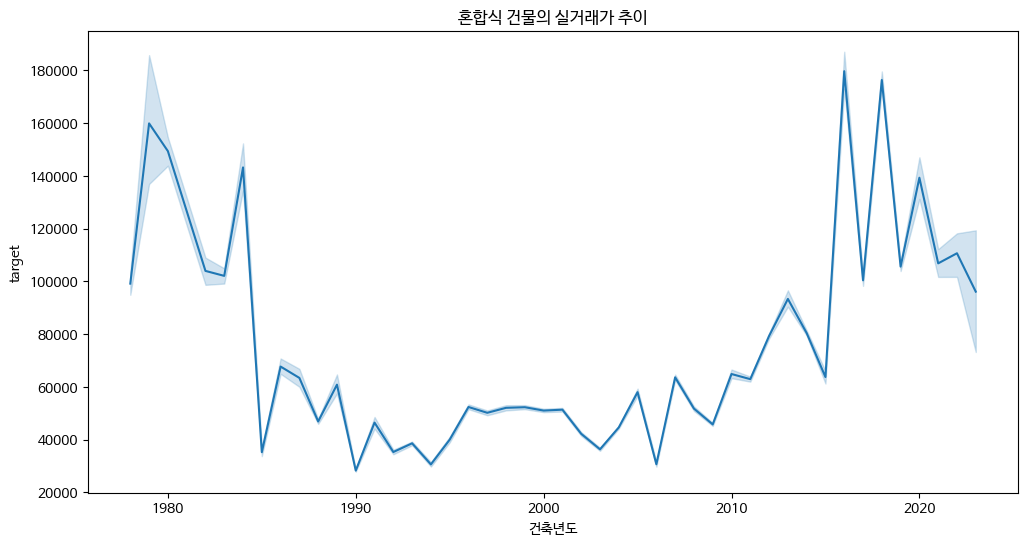

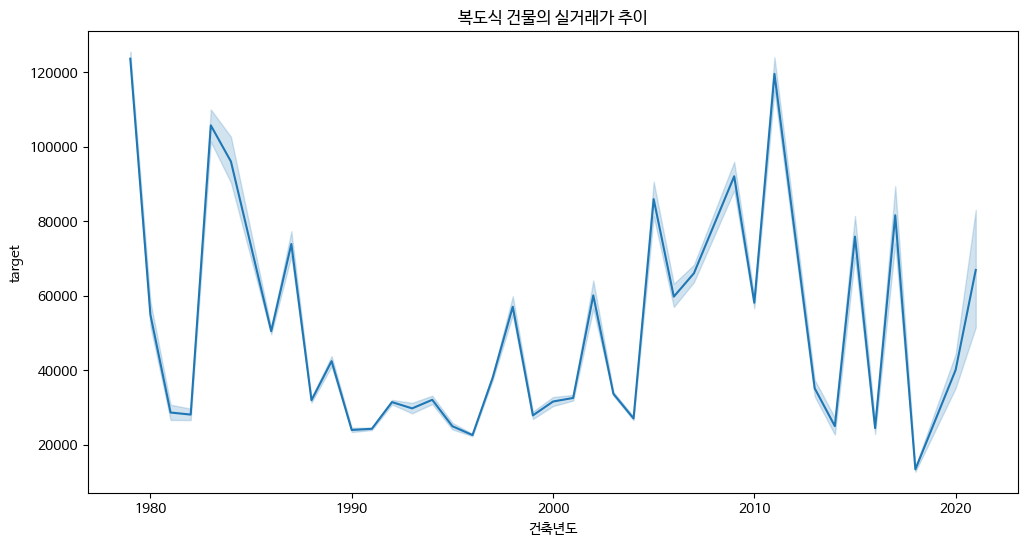

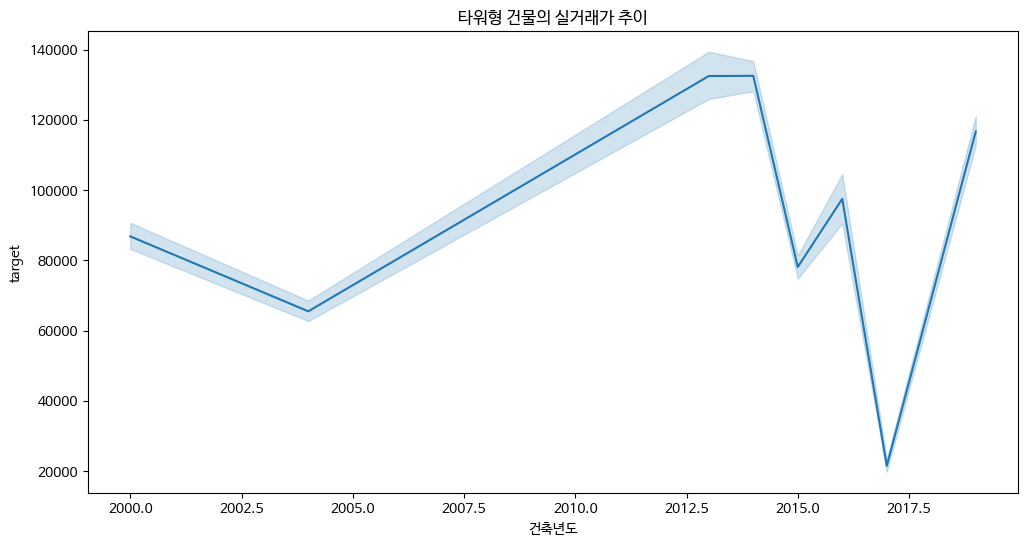

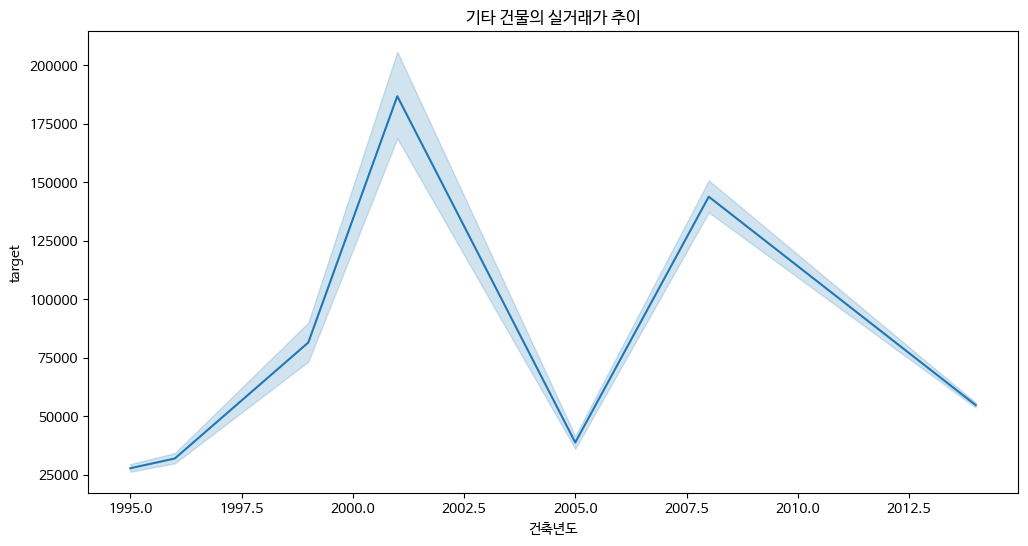

In [25]:
halls = ['계단식', '혼합식', '복도식', '타워형', '기타']
for i in range(5):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_selec[df_selec['복도유형'] == halls[i]], x='건축년도', y='target')
    plt.title(f"{halls[i]} 건물의 실거래가 추이")

plt.show()

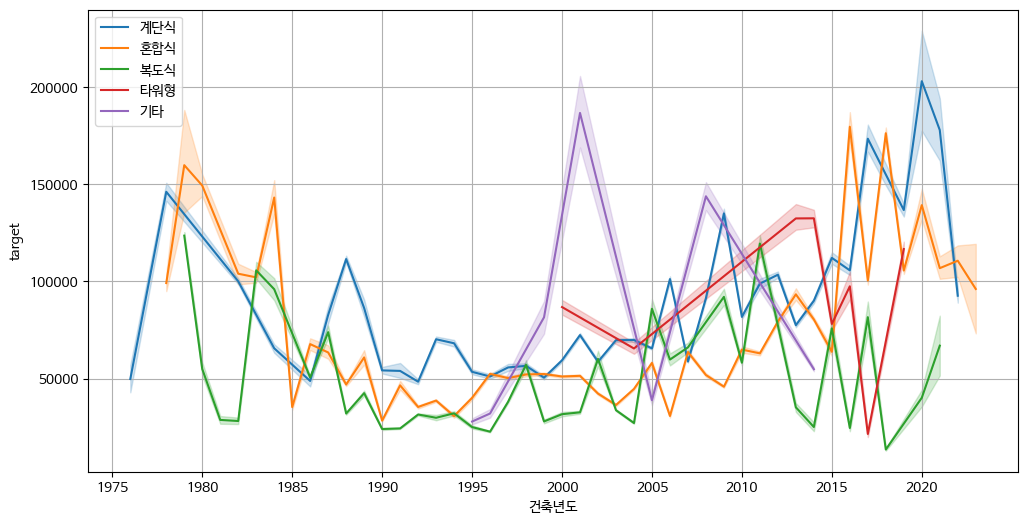

In [26]:
plt.figure(figsize=(12, 6))
plt.grid(True)
for i in range(5):
    sns.lineplot(data=df_selec[df_selec['복도유형'] == halls[i]], x='건축년도', y='target', label=halls[i])

plt.legend()
plt.xticks(range(1975, 2023, 5))
plt.show()

In [29]:
# 복도유형에 따른 결측치 패턴 확인하기
random_index = np.random.choice(len(df_selec))
print(random_index)
df_selec.iloc[random_index]

19586


번지                      1560-61
본번                       1560.0
부번                         61.0
아파트명                   서울대입구아이원
전용면적                      59.96
계약년월                     201802
계약일                          28
층                             7
건축년도                       2006
도로명                      청룡길 78
단지분류(아파트,주상복합등등)            NaN
세대타입(분양형태)                  NaN
관리방식                        NaN
복도유형                        NaN
난방방식                        NaN
전체동수                        NaN
전체세대수                       NaN
건설사(시공사)                    NaN
시행사                         NaN
연면적                         NaN
주거전용면적                      NaN
관리비부과면적                     NaN
전용면적별세대현황(18평이하)            NaN
전용면적별세대현황(18~25이하)          NaN
25~40이하                     NaN
40초과                        NaN
수정일자                        NaN
건축면적                        NaN
주차대수                        NaN
기타/의무/임대/임의=1/2/3/4         NaN
좌표X                         NaN
좌표Y     